<a href="https://colab.research.google.com/github/noahkarsky/testing-spatial-work/blob/main/Ocean_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geemap

In [4]:
import ee
import geemap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
%matplotlib inline

In [ ]:
ee.Authenticate()
ee.Initialize()

## First we should grab a number of different filters for our data

The first set of filters will be the actual polygon we wish to filter the data with

In [7]:
#This can be used to make an arbitrary polygon to use
polys = ee.Geometry.Polygon([
          [
            [
              -119.72351074218749,
              31.93351676190369
            ],
            [
              -117.9217529296875,
              31.93351676190369
            ],
            [
              -117.9217529296875,
              32.99023555965106
            ],
            [
              -119.72351074218749,
              32.99023555965106
            ],
            [
              -119.72351074218749,
              31.93351676190369
            ]
          ]
])


centroid = polys.centroid()
lng, lat = centroid.getInfo()['coordinates']
print("lng = {}, lat = {}".format(lng, lat))
#we can use this to make a rectangle to filter the data with

lng = -118.82263183593744, lat = 32.464050094585616


We have a number of other filters we can use on our data

In [22]:
Map = geemap.Map(center=[32,-118], zoom=10, )
Map.addLayer(polys,name='AOI')
Map

In [45]:
#first we grab a specific image collection
sentinel_collection = ee.ImageCollection("COPERNICUS/S2_SR")

#we can also grab a filtered image collection using the poly we made above
sentinel_collection = sentinel_collection.filterBounds(polys).filterDate('2019-07-01','2019-07-28').filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than',80)

#lets see how many images are in this collection
print(sentinel_collection.size().getInfo())


23


In [46]:
sentinel_collection = sentinel_collection.sort('system:time_start')
sentinel_collection.first().bandNames().getInfo()

['B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B8A',
 'B9',
 'B11',
 'B12',
 'AOT',
 'WVP',
 'SCL',
 'TCI_R',
 'TCI_G',
 'TCI_B',
 'MSK_CLDPRB',
 'MSK_SNWPRB',
 'QA10',
 'QA20',
 'QA60']

Text(0.5, 1.0, 'cdf for cloud pixel percentage')

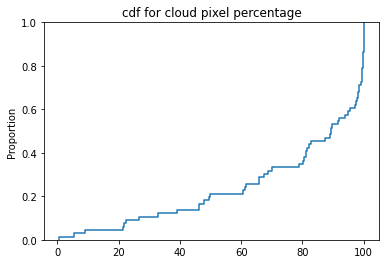

In [13]:
fig, ax = plt.subplots()
sns.ecdfplot(sentinel_collection.aggregate_array('CLOUDY_PIXEL_PERCENTAGE').getInfo(),)
plt.title('cdf for cloud pixel percentage')

In [47]:
collectionList = sentinel_collection.toList(sentinel_collection.size())

In [50]:
parameters = {'min': 0,
              'max': 3000,
              'dimensions': 512,
              'bands': ['B4', 'B3', 'B2'],
              'region': polys}
image = ee.Image(collectionList.get(2)).clip(polys)
Image(url = image.getThumbUrl(parameters))

In [53]:
map_image = ee.Image(collectionList.get(4)).clip(polys)
Map.addLayer(map_image,parameters)
Map

In [17]:

parameters = {'min': 0,
              'max': 1000,
              'bands': ['B4', 'B3', 'B2'],
              'region': AOI_poly}

imagem1=ee.Image(sentinel_collection.get(0))


Image(url = imagem1.getThumbUrl(parameters))

NameError: ignored

In [ ]:
image = sentinel_collection.first()
properties = geemap.image_props(image).getInfo()
properties['CLOUDY_PIXEL_PERCENTAGE']

In [ ]:
fig, ax = plt.subplots()
sns.ecdfplot(sentinel_collection.aggregate_array('CLOUDY_PIXEL_PERCENTAGE').getInfo(),)
plt.title('cdf for cloud pixel percentage')

In [ ]:
sentinel_image = sentinel_collection.filterBounds(AOI_poly).filterDate('2020-01-01','2020-01-28').sort("CLOUD_COVER").first()
Map.addLayer(sentinel_image,name='best image')

In [ ]:
#converting to a numpy array
AOI_poly =ee.Geometry.Rectangle([-75.7157, 36.8691 , -75.6707, 36.8372])
rgb_img = geemap.ee_to_numpy(sentinel_image.select(['B4',  'B3', 'B2']),region = AOI_poly)
rgb_img.shape

In [ ]:
plt.imshow(rgb_img)

In [ ]:
rgb_img_test = (255*((rgb_img[:, :, 0:3] - 100)/3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()

In [ ]:
sns.histplot(rgb_img.ravel())

Adding a medium composite of the selcted images

In [ ]:
median = sentinel_collection.median()
vis_params = {'bands': ['B4',  'B3', 'B2']}

In [ ]:
Map.addLayer(median,vis_params,name='median')

In [ ]:
sentinel_collection.get('index')

In [ ]:
Map.addLayer(image,name='first')

In [ ]:
Map.addLayer(sentinel_collection.)

In [ ]:
sentinel_collection.toList(sentinel_collection.size().getInfo())

In [ ]:
sent_img = sentinel_collection.mosaic()
Map.addLayer(sent_img)